# **Entregavel 2**

## Instalando pacotes

In [ ]:
!pip install dfply 
!pip install scikit-plot
!pip install graphviz
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 612 kB 26.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 768 kB/s 


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 4.4 MB/s 


## Importando bibliotecas

In [ ]:
import pandas as pd # para processamento de bancos de dados
import numpy as np # para processamento numérico de bancos de dados
import matplotlib # para geração de gráficos
import matplotlib.pyplot as plt # configurações adicionais para os gráficos a serem gerados

# informamos ao Python que estamos usando um notebook e que os gráficos devem ser exibidos nele
%matplotlib inline

import seaborn as sns #alternativa para a matplotlib para geração de gráficos

# SCIKIT-LEARN
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.metrics import classification_report
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

from dfply import *  # para importar os comandos da biblioteca dfply

import scikitplot as skplt

from dtreeviz.trees import *

import warnings # ignorando os warnings emitidos pelo Python
warnings.filterwarnings("ignore")

# configurações adicionais de figuras
plt.rcParams["figure.figsize"] = [10, 5]
plt.style.use("fivethirtyeight")
%config InlineBackend.figure_format = 'retina'
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
rc('mathtext',**{'default':'regular'})

np.random.seed(42)  # semente de aleatoriedade

O conjunto de dados são do Instituto Nacional de Diabetes e Doenças Digestivas e Renais do ministerio da saúde da India. O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem ou não tem diabetes, com base em diagnóstico incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com no mínimo 21 anos de idade e com ascendência indígena Pima.

Os conjuntos de dados estão divididos em variáveis ​​preditoras (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) e a classes(Outcome).



# Carregando dados

In [ ]:
#Carregamento do banco de dados
dataset = pd.read_csv("https://drive.google.com/uc?export=download&id=1a6V3BG96SQCGAhHiVYJCZE7wrqVhCW-E")

Visualizando os dados

In [ ]:
#Mostrado os dados
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape

(768, 9)

Análise dos dados

In [ ]:
#Informações basicas sobre os dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Todos os dados estão preenchidos, como vemos
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Descrição  estatisticas geral
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Visualização gráfica dos dados**

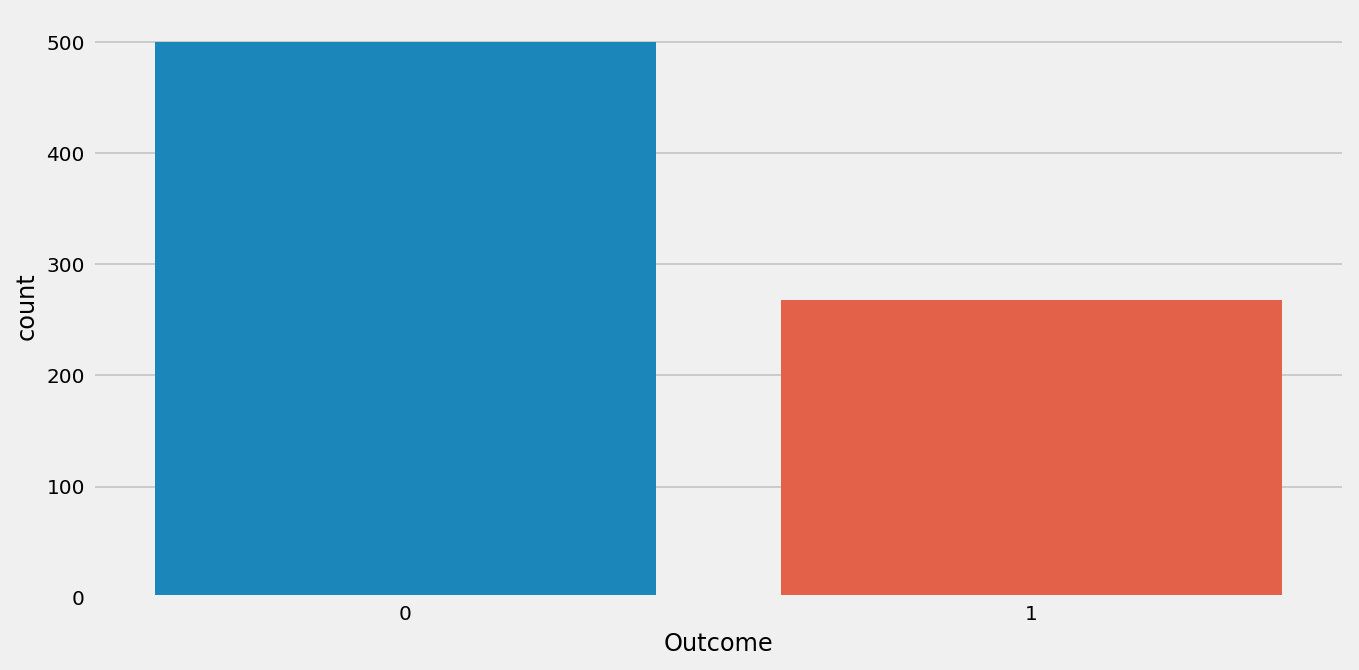

In [ ]:
np.unique(dataset["Outcome"], return_counts=True)
sns.countplot(x = dataset.Outcome);

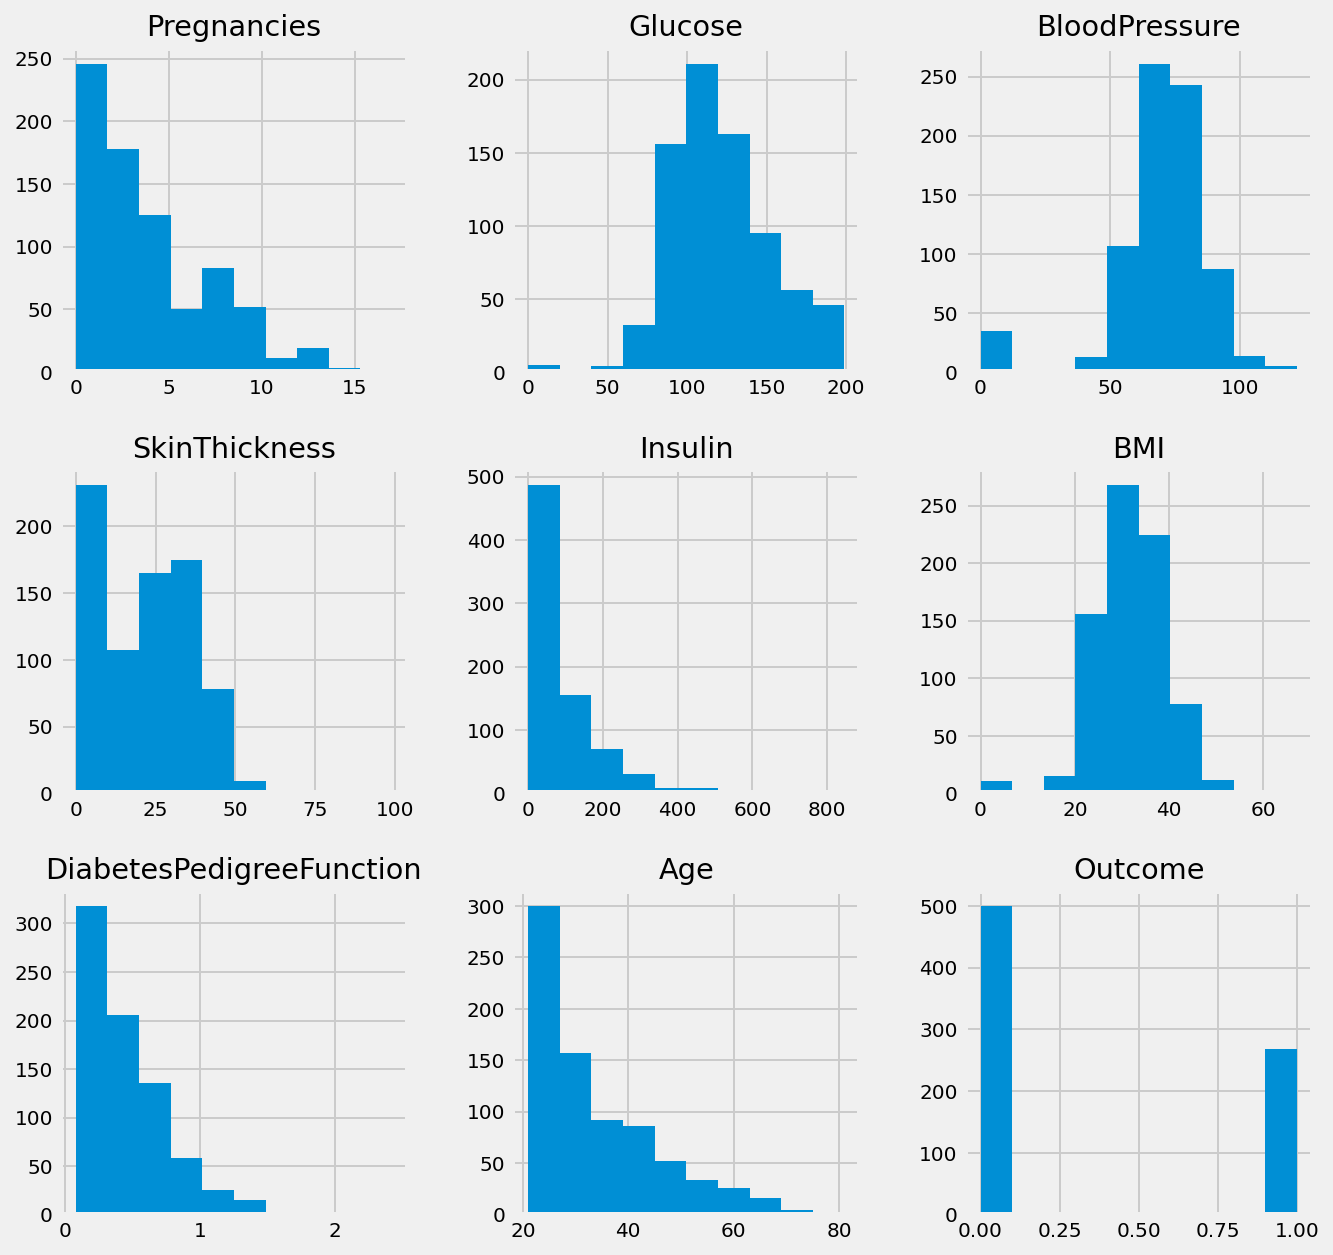

In [ ]:
plotar = dataset.hist(figsize = (10,10))

In [ ]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Divisão de previsores e classe

In [ ]:
pred = dataset.drop(['Outcome'], axis = 1)

In [ ]:
classe = dataset.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'], axis = 1)

In [ ]:
pred

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.600000,0.627000,50
1,1,85,66,29,0,26.600000,0.351000,31
2,8,183,64,0,0,23.300000,0.672000,32
3,1,89,66,23,94,28.100000,0.167000,21
4,0,137,40,35,168,43.100000,2.288000,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900000,0.171000,63
764,2,122,70,27,0,36.800000,0.340000,27
765,5,121,72,23,112,26.200000,0.245000,30
766,1,126,60,0,0,30.100000,0.349000,47


In [ ]:
classe

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


**Divisão treino e teste** 

In [ ]:
# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(pred, classe, test_size = 0.3, random_state = 42)

In [ ]:
X_train.columns
X_test.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
X_train_columns = X_train.columns
X_test_columns = X_test.columns

In [ ]:
# Visualização do tamanho dos dados de treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537, 1), (231, 1))

**Visualização de dados inconsistente**

In [ ]:
# Conversando com dois médicos fiquei sabendo que certas variaveis  seus valoes  não podem ser zero como:(Glucose, BloodPressure,SkinThickness,Insulin, BMI) 
# Portanto faz-se necessario fazer a imputação, lembrando que existem varias maneiras de imputação mas nesse trabalho vou usar a média 
X_train[X_train["Glucose"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
182,1,0,74,20,23,27.7,0.299,21
342,1,0,68,35,0,32.0,0.389,22
75,1,0,48,20,0,24.7,0.140,22
349,5,0,80,32,0,41.0,0.346,37
502,6,0,68,41,0,39.0,0.727,41


In [ ]:
X_train[X_train["BloodPressure"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
266,0,138,0,0,0,36.3,0.933,25
643,4,90,0,0,0,28.0,0.610,31
15,7,100,0,0,0,30.0,0.484,32
589,0,73,0,0,0,21.1,0.342,25
453,2,119,0,0,0,19.6,0.832,72
426,0,94,0,0,0,0.0,0.256,25
332,1,180,0,0,0,43.3,0.282,41
522,6,114,0,0,0,0.0,0.189,26
533,6,91,0,0,0,29.8,0.501,31
261,3,141,0,0,0,30.0,0.761,27


In [ ]:
X_train[X_train["SkinThickness"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
140,3,128,78,0,0,21.1,0.268,55
266,0,138,0,0,0,36.3,0.933,25
626,0,125,68,0,0,24.7,0.206,21
61,8,133,72,0,0,32.9,0.270,39
632,2,111,60,0,0,26.2,0.343,23
...,...,...,...,...,...,...,...,...
21,8,99,84,0,0,35.4,0.388,50
343,5,122,86,0,0,34.7,0.290,33
106,1,96,122,0,0,22.4,0.207,27
435,0,141,0,0,0,42.4,0.205,29


In [ ]:
X_train[X_train["Insulin"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
140,3,128,78,0,0,21.1,0.268,55
266,0,138,0,0,0,36.3,0.933,25
626,0,125,68,0,0,24.7,0.206,21
83,0,101,65,28,0,24.6,0.237,22
61,8,133,72,0,0,32.9,0.270,39
...,...,...,...,...,...,...,...,...
121,6,111,64,39,0,34.2,0.260,24
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [ ]:
X_train[X_train["BMI"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
426,0,94,0,0,0,0.0,0.256,25
9,8,125,96,0,0,0.0,0.232,54
522,6,114,0,0,0,0.0,0.189,26
371,0,118,64,23,89,0.0,1.731,21
684,5,136,82,0,0,0.0,0.640,69


**Imputação**

In [ ]:
# O valor zero nas variaveis (Glucose, BloodPressure,SkinThickness,Insulin, BMI) foram substituido pelas suas média
# De salientar ainda que existem outros métodos para imputação 
X_train.loc[X_train["Glucose"] == 0, "Glucose"]  = X_train.Glucose.mean()
X_train.loc[X_train["BloodPressure"] == 0, "BloodPressure"]  = X_train.BloodPressure.mean()
X_train.loc[X_train["SkinThickness"] == 0, "SkinThickness"]  = X_train.SkinThickness.mean()
X_train.loc[X_train["Insulin"] == 0, "Insulin"]  = X_train.Insulin.mean()
X_train.loc[X_train["BMI"] == 0, "BMI"]  = X_train.BMI.mean()
X_test.loc[X_test["BloodPressure"] == 0, "BloodPressure"]  = X_train.BloodPressure.mean()
X_test.loc[X_test["SkinThickness"] == 0, "SkinThickness"]  = X_train.SkinThickness.mean()
X_test.loc[X_test["Insulin"] == 0, "Insulin"]  = X_train.Insulin.mean()
X_test.loc[X_test["BMI"] == 0, "BMI"]  = X_train.BMI.mean()

**Padronização**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_test_columns)

In [ ]:
# Visualização de X_train 
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.84,-0.90,-1.00,-0.90,-0.65,-1.20,-0.61,-0.95
1,0.39,-0.56,-0.01,0.29,2.22,0.66,-0.91,-0.43
2,-1.14,0.43,-0.34,1.70,1.41,1.44,-0.31,-0.78
3,0.08,0.30,-0.34,-0.57,0.51,0.12,-0.91,-0.43
4,-0.84,-0.63,-3.45,1.27,-0.38,1.58,-0.84,-0.01


# **Algoritmos de machine leaning**

**Random Forest**

In [ ]:
# modelo random forest
rf = RandomForestClassifier(random_state=42, verbose=1)

**Otimização de hiperparâmetros**

In [ ]:
# Número de árvores no Random Forest
n_estimators = [10, 40, 100, 500]
# Número de features a serem consideradas a cada split
max_features = ["sqrt", "log2"]
# Número máximo de níveis na árvore
max_depth = [5, 10, 20]
# Número mínimo de amostras necessárias para dividir um nó
min_samples_split = [2, 5, 10]
# Número mínimo de amostras necessárias em cada leaf node
min_samples_leaf = [1, 5, 10]
# Método de seleção das amostras para treinamento de cada árvore
bootstrap = [True, False]
criterion = ["gini", "entropy", "log_loss"]


# Criação do parametro
parametros = {"criterion":criterion,
              "n_estimators":n_estimators, 
              "min_samples_split": min_samples_split,
              "min_samples_leaf": min_samples_leaf,
              "max_features": max_features, 
              "bootstrap": bootstrap
              
}


cv_rf = RandomizedSearchCV(rf, n_iter=60, cv=3, verbose=1, param_distributions=parametros, n_jobs = -1)


In [ ]:
# Otimizando os hiperparâmetros
cv_rf.fit(X_train, y_train)

best_parametros = cv_rf.best_params_

# melhores estimadores
best_estimador = cv_rf.best_estimator_

#best_resultado = cv_rf.best_score_
print("Melhor parametro:", best_parametros)
#print("Melhor resultado:", best_resultado)
print("Melhor estimador:", best_estimador)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Melhor parametro: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': True}
Melhor estimador: RandomForestClassifier(max_features='sqrt', min_samples_leaf=5, random_state=42,
                       verbose=1)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
# modelo random forest otimizado
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

Random Forest Model
Accuracy: 0.7532
Precision: 0.6386
Recall: 0.6625
AUC: 0.8048
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



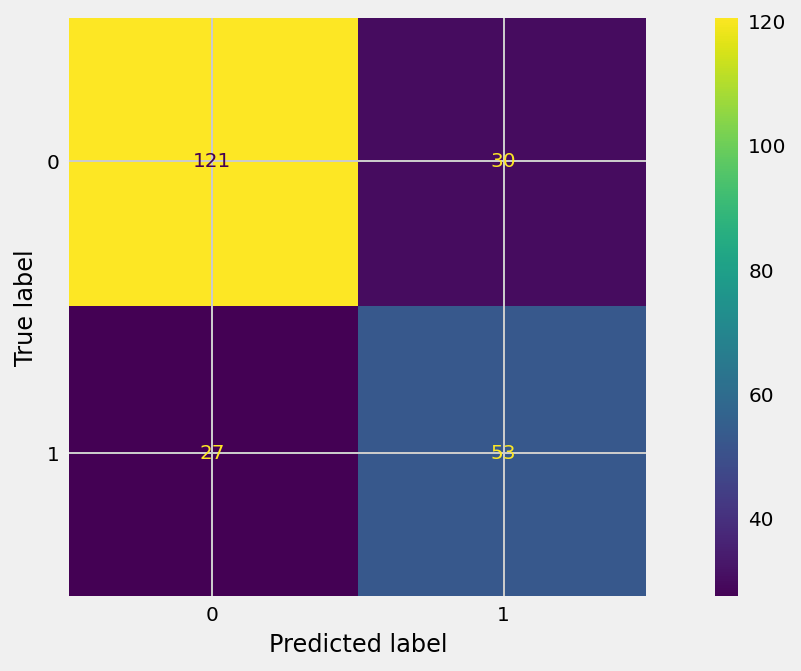

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred = rf.predict(X_test)
prob_pos_rf = rf.predict_proba(X_test)[:,1]


from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

print('Random Forest Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, pred)))
print("Precision: {:.4f}".format(precision_score(y_test, pred)))
print("Recall: {:.4f}".format(recall_score(y_test, pred)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_rf)))

print(classification_report(y_test, pred))

plot_confusion_matrix(rf, X_test, y_test);  
#plt.show()

## **XGBOOST**

In [ ]:
import xgboost as xgb

XGBoost Model
Accuracy: 0.7489
Precision: 0.6310
Recall: 0.6625
AUC: 0.8163
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



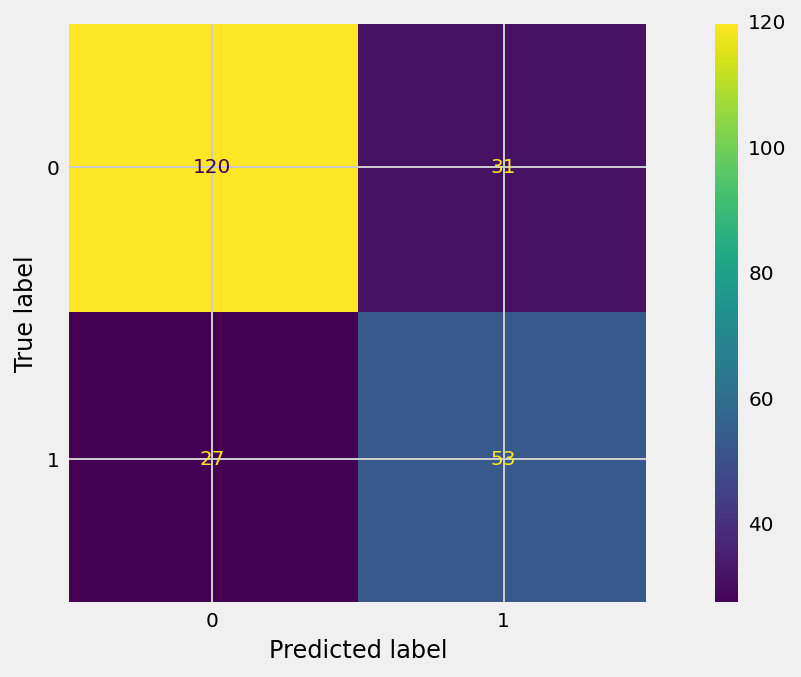

In [ ]:

clf_xgboost = xgb.XGBClassifier()
clf_xgboost.fit(X_train, y_train)

pred = clf_xgboost.predict(X_test)
prob_pos_xgboost = clf_xgboost.predict_proba(X_test)[:,1]

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, pred)))
print("Precision: {:.4f}".format(precision_score(y_test, pred)))
print("Recall: {:.4f}".format(recall_score(y_test, pred)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost)))

print(classification_report(y_test, pred))

plot_confusion_matrix(clf_xgboost, X_test, y_test); 

## **LightGBM**

In [ ]:
import lightgbm as lgb

LightGBM Model
Accuracy: 0.7316
Precision: 0.6023
Recall: 0.6625
AUC: 0.7801
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.66      0.63        80

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.73       231



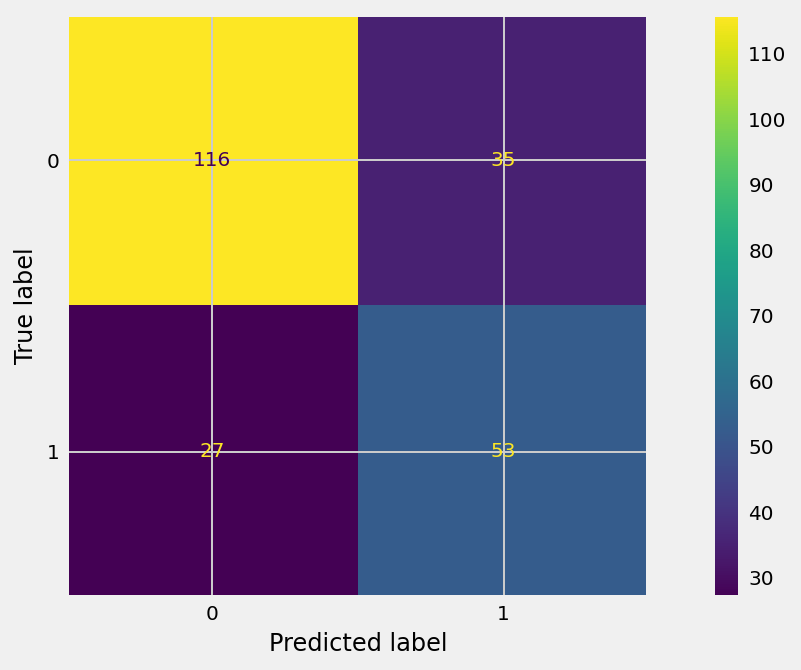

In [ ]:
clf_lgbm = lgb.LGBMClassifier()
clf_lgbm.fit(X_train, y_train)

pred = clf_lgbm.predict(X_test)
prob_pos_lgbm = clf_lgbm.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

print('LightGBM Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, pred)))
print("Precision: {:.4f}".format(precision_score(y_test, pred)))
print("Recall: {:.4f}".format(recall_score(y_test, pred)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_lgbm)))


print(classification_report(y_test, pred))

plot_confusion_matrix(clf_lgbm, X_test, y_test);

## **Catboost**

In [ ]:
from catboost import CatBoostClassifier

Learning rate set to 0.5
0:	learn: 0.5736822	total: 1.22ms	remaining: 4.9ms
1:	learn: 0.5114652	total: 2.31ms	remaining: 3.47ms
2:	learn: 0.4716229	total: 3.56ms	remaining: 2.37ms
3:	learn: 0.4431360	total: 5.11ms	remaining: 1.28ms
4:	learn: 0.4233578	total: 6.12ms	remaining: 0us
Catboost Model
Accuracy: 0.7446
Precision: 0.6479
Recall: 0.5750
AUC: 0.7786
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



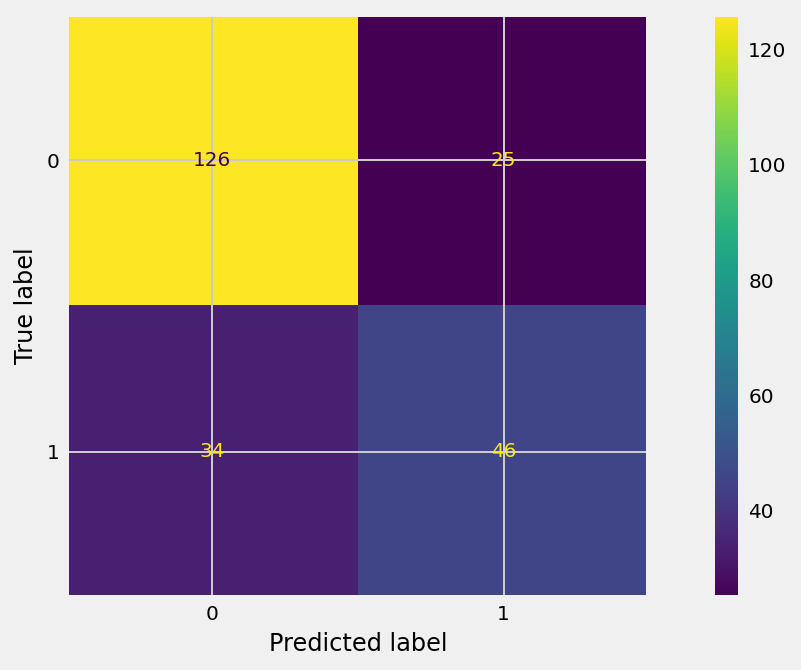

In [ ]:
clf_catboost = CatBoostClassifier(iterations = 5)
clf_catboost.fit(X_train, y_train)

pred =clf_catboost.predict(X_test)
prob_pos_catboost = clf_catboost.predict_proba(X_test)[:,1]


from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

print('Catboost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, pred)))
print("Precision: {:.4f}".format(precision_score(y_test, pred)))
print("Recall: {:.4f}".format(recall_score(y_test, pred)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_catboost)))

print(classification_report(y_test, pred))

plot_confusion_matrix(clf_catboost, X_test, y_test);

# Comparação e vizualização dos melhores resultados

In [ ]:
col_names = ["Modelo", "Accuracy", "Precision", "Recall", "AUC(ROC)"]

data = [["Random Forest", accuracy_score(y_test, pred),precision_score(y_test, pred),recall_score(y_test, pred),roc_auc_score(y_test, prob_pos_rf)],
        ["XGBoost", accuracy_score(y_test, pred),precision_score(y_test, pred),recall_score(y_test, pred),roc_auc_score(y_test, prob_pos_xgboost)],
        ["LightGBM", accuracy_score(y_test, pred),precision_score(y_test, pred),recall_score(y_test, pred),roc_auc_score(y_test, prob_pos_lgbm)],
        ["Catboost", accuracy_score(y_test, pred),precision_score(y_test, pred),recall_score(y_test, pred),roc_auc_score(y_test, prob_pos_catboost)]]

In [ ]:
# Todos os modelos tiveram o mesmo desempenho na (Accuracy, Precision, Recall), porém o XGBoost superou todos na AUC(ROC) . 

pd.set_option('display.float_format', lambda x: '%2f' % x) # tabela com três casas decimais

print('Resultados para conjunto de teste.')
df_results = pd.DataFrame(data, columns = col_names) # transformando os resultados do teste em um data.frame

# função para destacarmos os maiores valores em cada uma das métricas
def highlight_max(s):
    if s.dtype == np.object: 
        is_max = [False for _ in range(s.shape[0])] # estamos declarando que quando o tipo de dado for objeto, não aplicaremos o highlight
    else:
        is_max = s == s.max()
    return ['background: yellow' if cell else '' for cell in is_max]
  
df_results.style.apply(highlight_max)


Resultados para conjunto de teste.


,Modelo,Accuracy,Precision,Recall,AUC(ROC)
0,Random Forest,0.744589,0.647887,0.575000,0.804222
1,XGBoost,0.744589,0.647887,0.575000,0.816308
2,LightGBM,0.744589,0.647887,0.575000,0.780132
3,Catboost,0.744589,0.647887,0.575000,0.778642


# Seleção de variáveis com o BORUTA

In [ ]:
# As variaveis preditoras foram reduzidas de 8 para 7 variáveis depois da aplicação do Boruta
# criando estimador para o Boruta
rf = RandomForestClassifier(n_jobs = -1, class_weight='balanced', max_depth = 5, verbose=0, random_state=42)

selecionador = BorutaPy(rf, n_estimators = 'auto', max_iter = 100) # number of trials to perform

# parametrizando para o conjunto de treino
selecionador.fit(np.array(X_train), np.array(y_train))

# resultados
green_area = X_train.columns[selecionador.support_].to_list()
blue_area = X_train.columns[selecionador.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
features in the blue area: []


Visualização dos dados depois da aplicação do selecionador de **variáveis**

In [ ]:
#As variaveis preditoras foram reduzidas de 8 para 7 variáveis depois da aplicação do Boruta

X_train_boruta = X_train[['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

X_test_boruta = X_test[['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

print('Shape sem boruta', X_train.shape, X_test.shape)
print('Shape com boruta', X_train_boruta.shape, X_test_boruta.shape)

Shape sem boruta (537, 8) (231, 8)
Shape com boruta (537, 7) (231, 7)


# xgboost_com_boruta

In [ ]:
# Aplicando o boruta os resultados para o modelo XGBOOST teve uma ligeira melhoria no AUC

clf_xgboost_boruta = xgb.XGBClassifier()
clf_xgboost_boruta.fit(X_train_boruta, y_train)

y_pred_xgboost_boruta = clf_xgboost_boruta.predict(X_test_boruta)
prob_pos_xgboost_boruta = clf_xgboost_boruta.predict_proba(X_test_boruta)[:,1]

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost_boruta)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost_boruta)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost_boruta)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost_boruta)))

print(classification_report(y_test, pred))

XGBoost Model
Accuracy: 0.7446
Precision: 0.6265
Recall: 0.6500
AUC: 0.8180
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.63      0.65      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.75       231



# Random Forest_com_boruta

In [ ]:
# Aplicando o boruta os resultados para o modelo com Random Forest melhorou significaticamente

rf_com_boruta = RandomForestClassifier()
rf_com_boruta.fit(X_train_boruta, y_train)

pred = rf_com_boruta.predict(X_test_boruta)
prob_pos_rf = rf_com_boruta.predict_proba(X_test_boruta)[:,1]


from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

print('Random Forest Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, pred)))
print("Precision: {:.4f}".format(precision_score(y_test, pred)))
print("Recall: {:.4f}".format(recall_score(y_test, pred)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_rf)))

print(classification_report(y_test, pred))


Random Forest Model
Accuracy: 0.7662
Precision: 0.6585
Recall: 0.6750
AUC: 0.8096
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       151
           1       0.66      0.68      0.67        80

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231

